In [13]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv('Advertising.csv')

# Question 1

In [8]:
shape(df)

(200, 5)

In [11]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Question 2

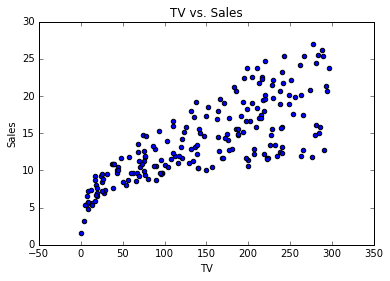

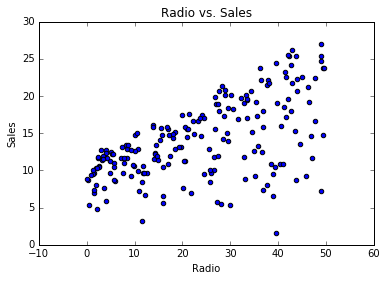

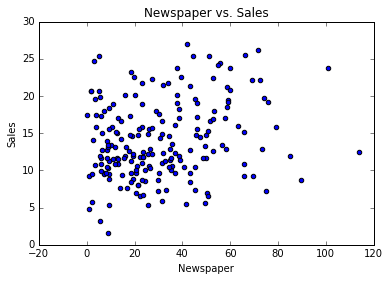

In [20]:
df.plot(kind = 'scatter', x = 'TV', y = 'Sales', title = 'TV vs. Sales')
df.plot(kind = 'scatter', x = 'Radio', y = 'Sales', title = 'Radio vs. Sales')
df.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', title = 'Newspaper vs. Sales')


# Question 3

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from patsy import dmatrices

In [40]:
df_TV = df[['Sales', 'TV']]
formula = 'Sales ~ TV'
Y, X = dmatrices(formula, df_TV, return_type='dataframe')
y = Y['Sales'].values

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(X, y)

In [42]:
print 'Coefficients: \n', model.coef_

Coefficients: 
[ 0.          0.04753664]


# Question 4

## Part A

In [46]:
formula2 = 'Sales ~ TV + Radio + Newspaper'
df_Regression = df[['Sales','TV', 'Radio', 'Newspaper']]
Y2, X2 = dmatrices(formula2, df_Regression, return_type='dataframe')
y2 = Y2['Sales'].values

In [125]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=2)

In [126]:
model2 = LinearRegression()
result = model2.fit(X_train, y_train)

In [127]:
prediction_test = model2.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, prediction_test))

In [128]:
rms

2.1775228158971087

## Part B

In [129]:
prediction_train = model2.predict(X_train)
rms_train = sqrt(mean_squared_error(y_train, prediction_train))

In [130]:
rms_train

1.3964606875121521

## Part C

In [131]:
print 'Coefficients: \n', model2.coef_

Coefficients: 
[ 0.          0.04636816  0.179256    0.00489395]


## Part D

In [132]:
residuals = y_test - prediction_test

(array([  1.,   0.,   1.,   2.,   7.,   5.,   5.,  24.,  17.,   4.]),
 array([-8.70641607, -7.58046982, -6.45452358, -5.32857733, -4.20263108,
        -3.07668484, -1.95073859, -0.82479234,  0.3011539 ,  1.42710015,
         2.55304639]),
 <a list of 10 Patch objects>)

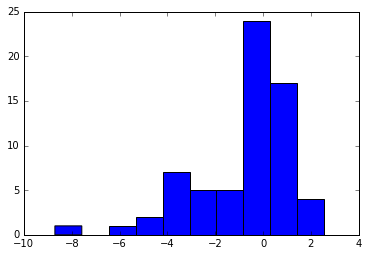

In [135]:
plt.hist(residuals, bins = 10)